# Classificação de Dígitos Escritos a Mão
#### Usando uma rede neural para identificar dígitos numéricos escritos a mão (rede neural convolucional).

### Importação das Bibliotecas

In [1]:
# importando a biblioteca matplotlib do python
import matplotlib.pyplot as plt
# importando da biblioteca keras do python
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


### Tratando a Base de Dados

In [2]:
# separando a base de dados de treinamento da base de dados de teste
(x_treinamento, y_treinamento), (x_teste, y_teste) = mnist.load_data()

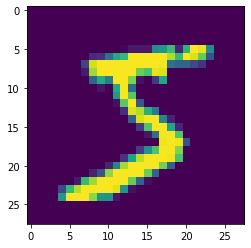

In [3]:
# visualizando a imagem armazenada nos dados
plt.imshow(x_treinamento[0])

Observe que a imagem apresenta mais de uma dimensão por ser colorida (camada RGB). Como essas cores não causam interferência na rede neural, podemos torná-la preto e branco visando economizar tempo no processamento.

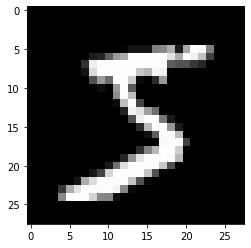

In [4]:
# visualizando a imagem armazenada nos dados em escala de cinza
plt.imshow(x_treinamento[0], cmap = 'gray')

Observe também que para cada imagem há uma classe que ela representa. Vamos visualizá-la.

In [5]:
# visualizando a imagem armazenada nos dados em escala de cinza
plt.imshow(x_treinamento[0], cmap = 'gray')
plt.title('Classe ' + str(y_treinamento[0]))

Text(0.5, 1.0, 'Classe 5')

In [6]:
# visualizando as dimensões da base de dados
print(x_treinamento.shape)
print(y_treinamento.shape)
print(x_teste.shape)
print(y_teste.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
# visualizando as classes (números de 0-9)
print(y_treinamento)
print(y_teste)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [8]:
# modificando a dimensão das imagens
previsores_treinamento = x_treinamento.reshape(x_treinamento.shape[0], 
                                               28, 28, 1)
previsores_teste = x_teste.reshape(x_teste.shape[0], 28, 28, 1)

In [9]:
# visualizando a nova dimensão das imagens
print(previsores_treinamento.shape)
print(previsores_teste.shape)
# observe que há 60000 imagens de treinamento e 10000 imagens de teste. Elas 
# possuem a dimensão (28, 28) e possuem apenas uma dimensão (cor na escala de
# cinza)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
# modificando os dados de int para float (isso ajudará na normalização dos dados)
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')

In [11]:
# normalizando as imagens para facilitar no processamento
previsores_treinamento /= 255
previsores_teste /= 255 

In [12]:
# transformando os atributos meta em variáveis do tipo dummy
classe_treinamento = np_utils.to_categorical(y_treinamento, 10)
classe_teste = np_utils.to_categorical(y_teste, 10)

In [13]:
# visualizando as dimensões dos atributos meta
print(classe_treinamento.shape)
print(classe_teste.shape)
# isso ajudará a aplicar a função de ativação softmax na camada de saída

(60000, 10)
(10000, 10)


### Estrutura da Rede Neural

In [14]:
# criando um objeto classificador
classificador = Sequential()

#### Etapa 1 - Operador de Convolução

In [15]:
# adicionando uma camada de convolução com diversas imagens de kernel
classificador.add(Conv2D(32, (3,3), 
                         strides = (1, 1), 
                         input_shape = (28, 28, 1), 
                         activation = 'relu'))
# foi definido a construção de 32 mapas de caracteríticas usando um detector de 
# características (3, 3). 'strides' define o passo do detector de 
# características

#### Etapa 2 - Pooling

In [16]:
# adicionando uma camade de pooling para extrair um mapa de características
# da imagem
classificador.add(MaxPooling2D(pool_size = (2, 2)))

#### Etapa 3 - Flattening

In [17]:
# transformando a imagem em um único vetor para auxiliar no processamento da 
# rede neural
classificador.add(Flatten())

#### Etapa 4 - Criando a Rede Neural

In [18]:
# adicionando uma camada oculta a rede neural
classificador.add(Dense(units = 128, activation = 'relu'))

In [19]:
# adicionando uma camada de saída a rede neural
classificador.add(Dense(units = 10, activation = 'softmax'))

In [20]:
# configurando alguns parâmetros da rede neural
classificador.compile(loss = 'categorical_crossentropy', 
                      optimizer = 'adam',
                      metrics = ['accuracy'])

### Treinamento da Rede Neural

In [22]:
# realizando o treinamento da rede neural
classificador.fit(previsores_treinamento, 
                  classe_treinamento, 
                  batch_size = 128, 
                  epochs = 10,
                  validation_data = (previsores_teste, classe_teste))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 489us/step - loss: 0.2252 - accuracy: 0.9369 - val_loss: 0.0719 - val_accuracy: 0.9780
Epoch 2/10
60000/60000 [==============================] - 29s 479us/step - loss: 0.0655 - accuracy: 0.9802 - val_loss: 0.0515 - val_accuracy: 0.9829
Epoch 3/10
60000/60000 [==============================] - 29s 480us/step - loss: 0.0455 - accuracy: 0.9865 - val_loss: 0.0495 - val_accuracy: 0.9838
Epoch 4/10
60000/60000 [==============================] - 29s 490us/step - loss: 0.0344 - accuracy: 0.9896 - val_loss: 0.0488 - val_accuracy: 0.9846
Epoch 5/10
60000/60000 [==============================] - 29s 481us/step - loss: 0.0265 - accuracy: 0.9918 - val_loss: 0.0438 - val_accuracy: 0.9861
Epoch 6/10
60000/60000 [==============================] - 29s 480us/step - loss: 0.0196 - accuracy: 0.9941 - val_loss: 0.0460 - val_accuracy: 0.9851
Epoch 7/10
60000/60000 [==============================] 

### Visualizando a Acurácia e a Loss da Rede Neural

In [23]:
# visualizando a acurácia e a loss da rede neural
resultado = classificador.evaluate(previsores_teste, classe_teste)
print(resultado)

10000/10000 [==============================] - 2s 205us/step
[0.04413765362167433, 0.9886000156402588]
